# Import Libaries and Datasets

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random, itertools, re, warnings
warnings.filterwarnings('ignore')

# import the modelling libraries
import joblib as jb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

## First Approach

In [2]:
# # save the name of dataset
# df_name = 'hungarian.data'

In [3]:
# # load the dataset
# with open(df_name, encoding='Latin1') as file:
#   lines = [line.strip() for line in file]

# lines[0:10]

## Second Approach

In [4]:
# # import from google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# # create list of google drive
# !ls '/content/drive/MyDrive'

In [6]:
# # save the name of datasets
# df_name = '/content/drive/MyDrive/hungarian.data'

In [7]:
# # load the dataset
# with open(df_name, encoding='Latin1') as file:
#   lines = [line.strip() for line in file]

# lines[0:10]

In [8]:
# # encode the datasets
# data = itertools.takewhile(
#     lambda x: len(x) == 76,
#     (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
# )

# # read the datasets
# df = pd.DataFrame.from_records(data)

# # show the datasets
# df.head()

## Third Approach

In [9]:
# clone from public github repository
!git clone 'https://github.com/AreIsAndI/heart-disease-hungarian.git'

Cloning into 'heart-disease-hungarian'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 24.59 KiB | 3.07 MiB/s, done.


In [10]:
# save the name of dataset
df_name = '/content/heart-disease-hungarian/hungarian.data'

In [11]:
# load the dataset
with open(df_name, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [12]:
# encode the datasets
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)

# read the datasets
df = pd.DataFrame.from_records(data)

# show the datasets
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


# Data Preprocessing

In [13]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [14]:
# drop id and name (unused features)
df = df.iloc[:, 1:-1].copy()
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0,40,1,1,0,0,-9,2,140,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
1,0,49,0,1,0,0,-9,3,160,1,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
2,0,37,1,1,0,0,-9,2,130,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
3,0,48,0,1,1,1,-9,4,138,0,...,-9,2,-9,1,1,1,1,1,-9.,-9.
4,0,54,1,1,0,1,-9,3,150,0,...,-9,1,-9,1,1,1,1,1,-9.,-9.


In [15]:
# change the datatype
df = df.astype(float)

In [16]:
# change the value from -9.0 to NaN
df = df.replace(-9.0, np.nan)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


## Chosen Features

In [17]:
# choose 14 features based on research
mod_df = df.iloc[:, [1,2,7,8,10,14,17,30,36,38,39,42,49,56]].copy()
mod_df.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [18]:
# rename the columns
mod_df = mod_df.rename(columns={
  2:'age',
  3:'sex',
  8:'cp',
  9:'trestbps',
  11:'chol',
  15:'fbs',
  18:'restecg',
  31:'thalach',
  37:'exang',
  39:'oldpeak',
  40:'slope',
  43:'ca',
  50:'thal',
  57:'target'
})
mod_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


## Data Cleaning

In [19]:
# check the null values
mod_df.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [20]:
# check th3 duplicated values
mod_df.duplicated().sum()

1

In [21]:
# calculate the mean value from numeric features
mean_trestbps = round(np.mean(mod_df['trestbps']), 2)
mean_chol = round(np.mean(mod_df['chol']), 2)
mean_fbs = round(np.mean(mod_df['fbs']), 2)
mean_restecg = round(np.mean(mod_df['restecg']), 2)
mean_thalach = round(np.mean(mod_df['thalach']), 2)
mean_exang = round(np.mean(mod_df['exang']), 2)

# fill null values with mean
mean_values = {
    'trestbps': mean_trestbps,
    'chol': mean_chol,
    'fbs': mean_fbs,
    'restecg': mean_restecg,
    'thalach': mean_thalach,
    'exang': mean_exang,
}
mod_df = mod_df.fillna(mean_values)

In [22]:
# drop the chosen features
drop_features = ['ca','slope','thal']
mod_df = mod_df.drop(drop_features, axis=1)

In [23]:
# drop the duplicated data
mod_df = mod_df.drop_duplicates()

In [24]:
# drop the unknown data
mod_df = mod_df[mod_df['fbs'] != 0.07].copy()
mod_df = mod_df[mod_df['restecg'] != 0.22].copy()
mod_df = mod_df[mod_df['exang'] != 0.3].copy()

In [25]:
# check again the data info
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    float64
 1   sex       283 non-null    float64
 2   cp        283 non-null    float64
 3   trestbps  283 non-null    float64
 4   chol      283 non-null    float64
 5   fbs       283 non-null    float64
 6   restecg   283 non-null    float64
 7   thalach   283 non-null    float64
 8   exang     283 non-null    float64
 9   oldpeak   283 non-null    float64
 10  target    283 non-null    float64
dtypes: float64(11)
memory usage: 26.5 KB


## Exploratory Data Analysis

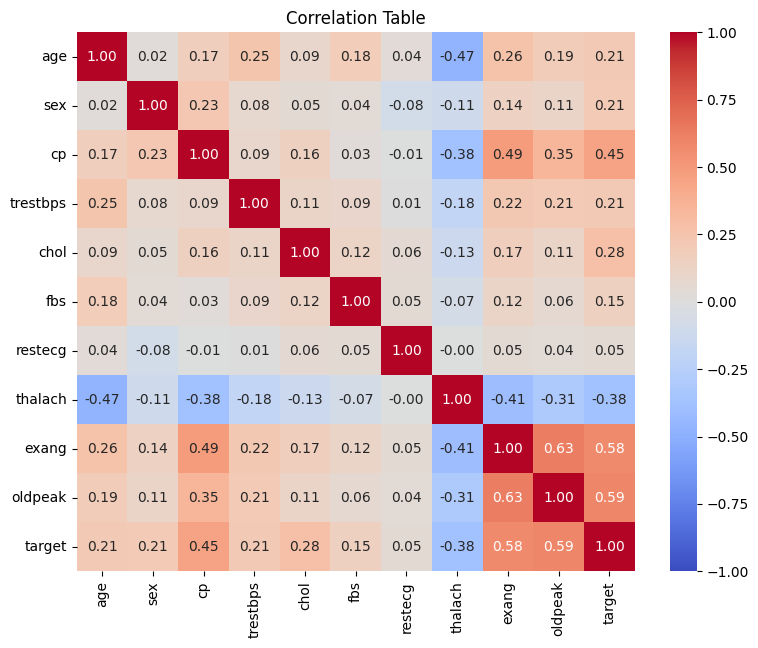

In [26]:
# check the data correlation and visualize it
plt.figure(figsize=(9, 7))
sns.heatmap(mod_df.corr(), annot=True,
            fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Table')
plt.show()

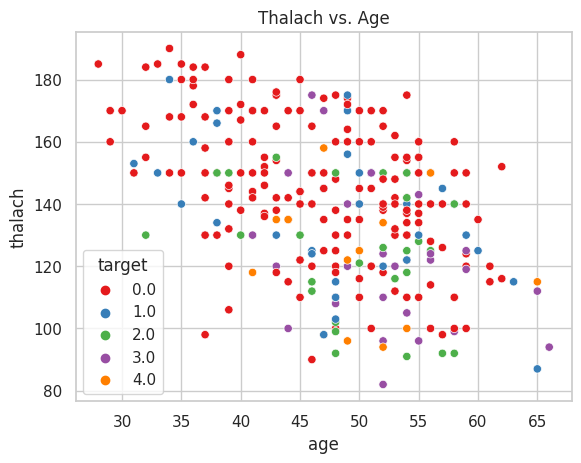

In [27]:
# show the correlation visualization between two choosen features
sns.set_theme(style = 'whitegrid')
sns.scatterplot(data = mod_df,
                x = 'age',
                y = 'thalach',
                hue = 'target',
                palette='Set1')
plt.title('Thalach vs. Age')
plt.show()

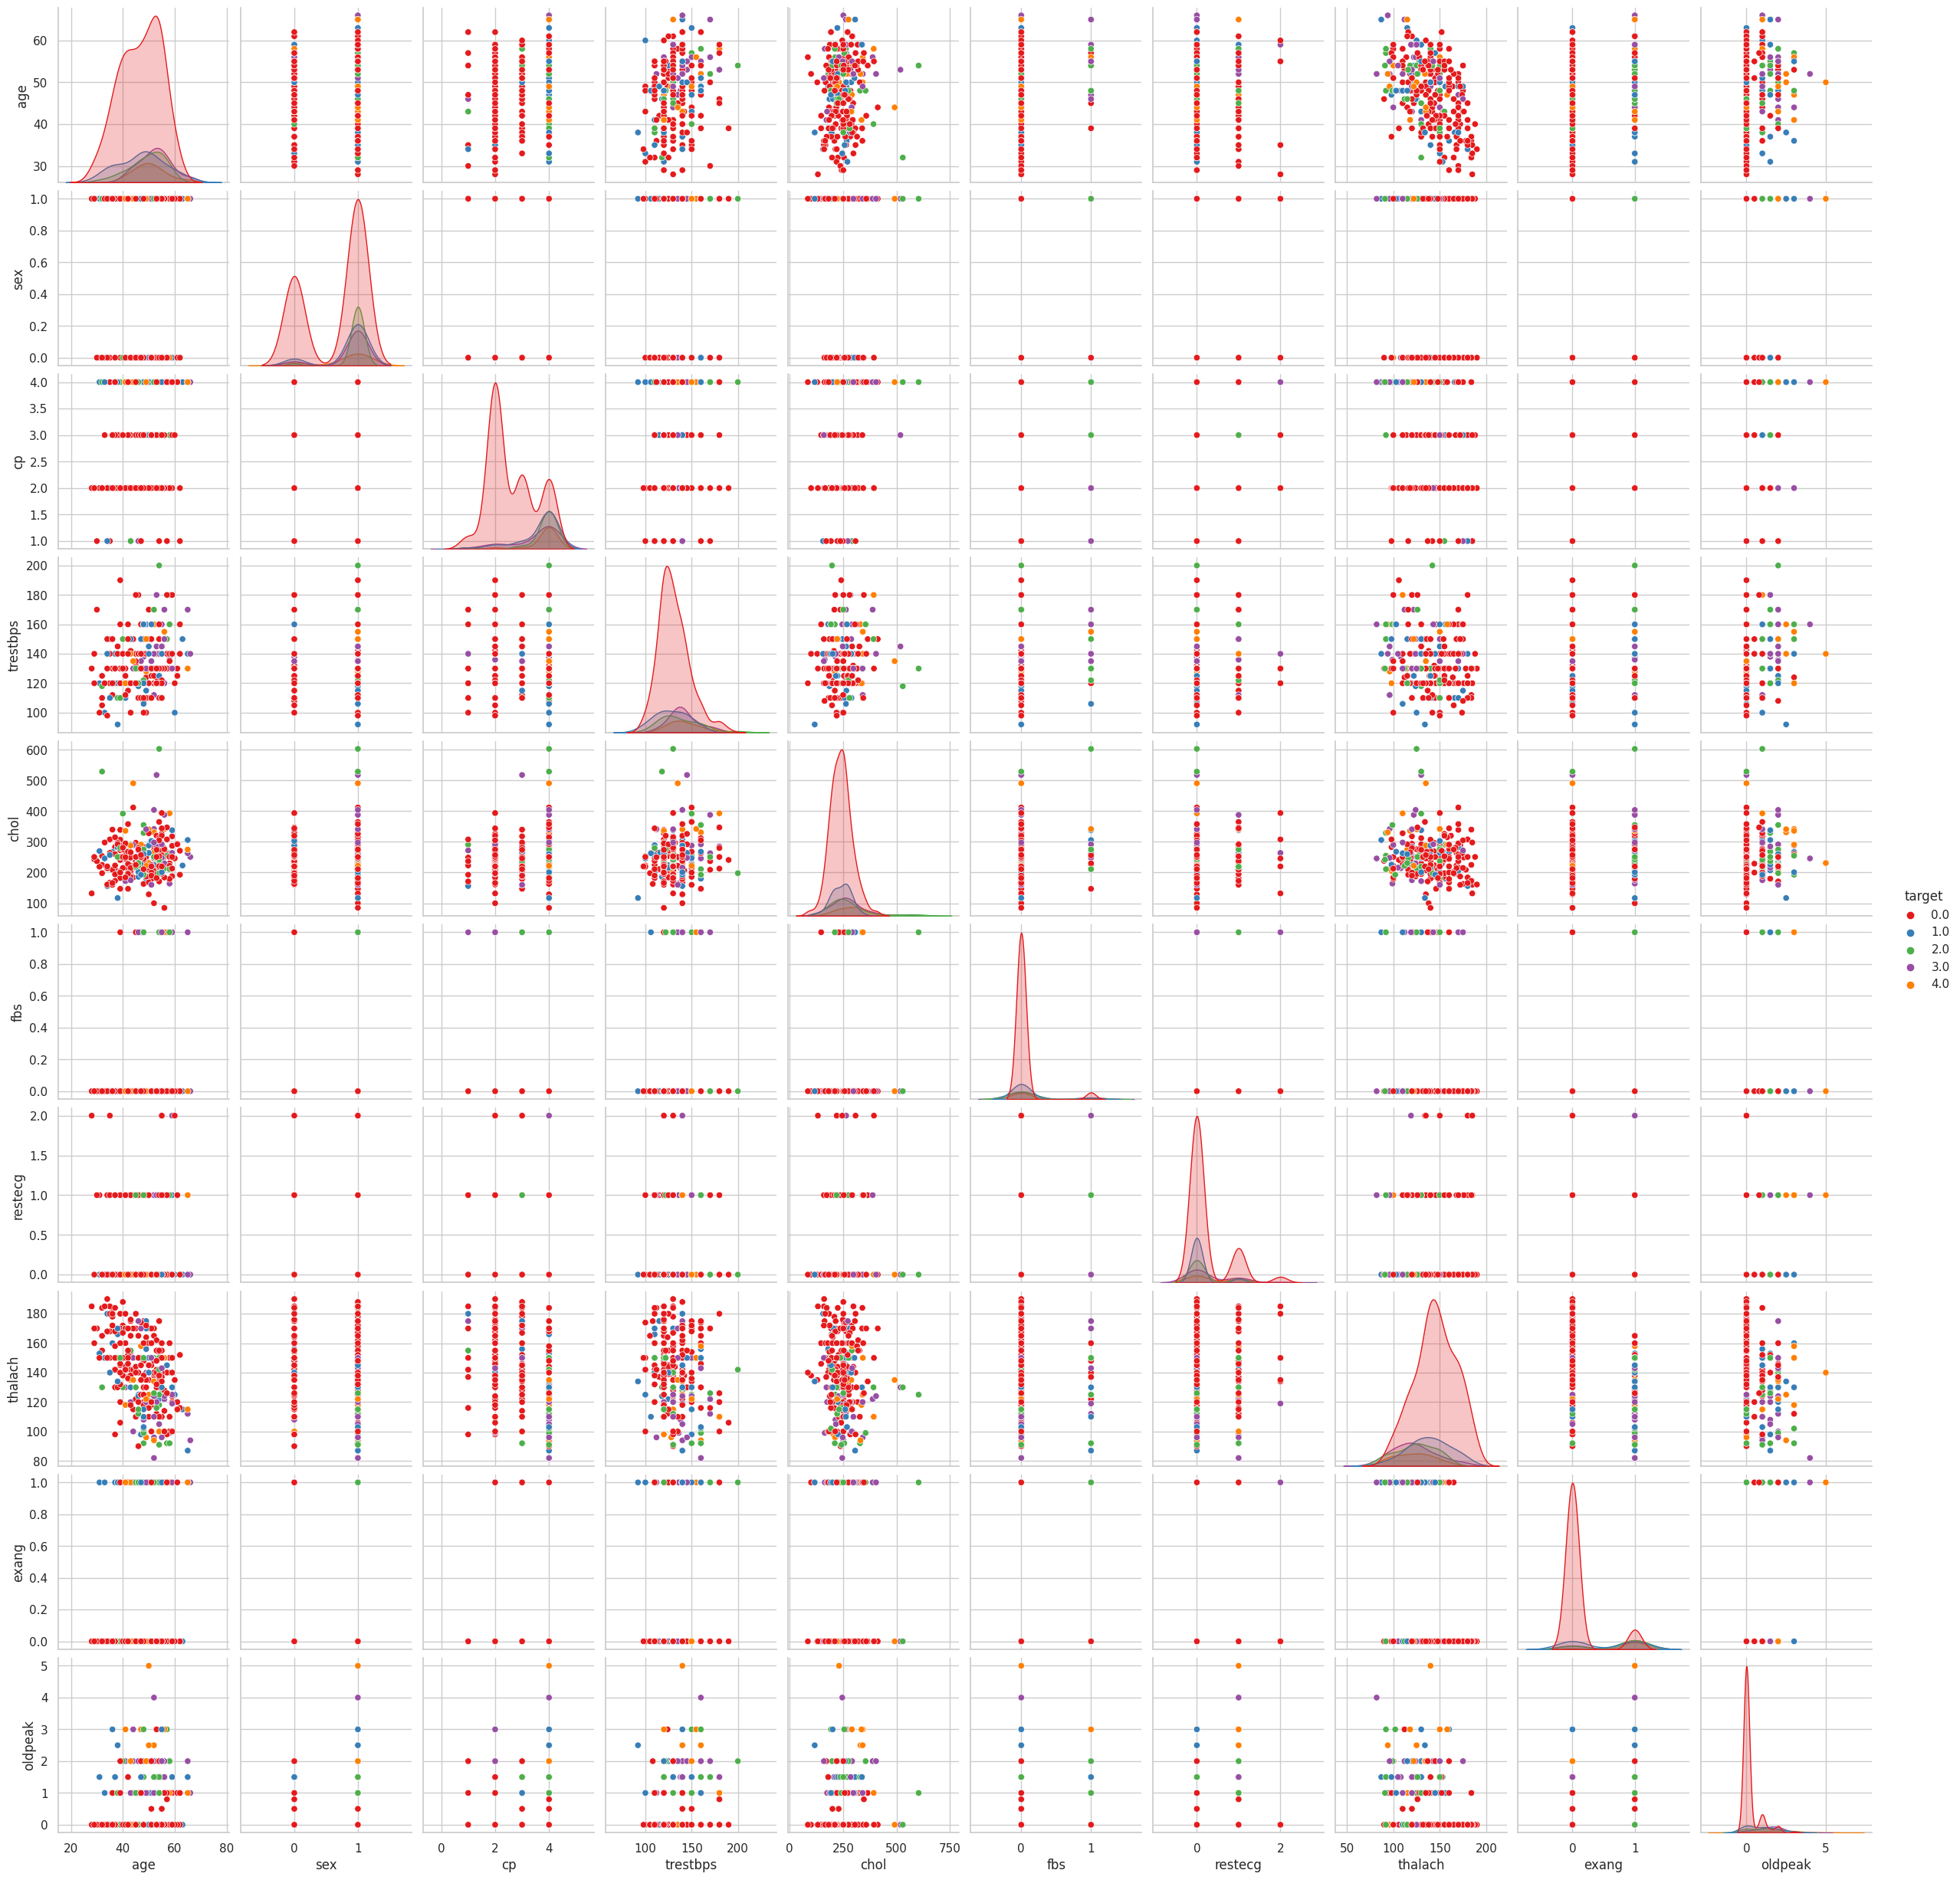

In [28]:
# show the datasets pairplot
sns.pairplot(data = mod_df,
             hue = 'target',
             palette='Set1')
plt.show()

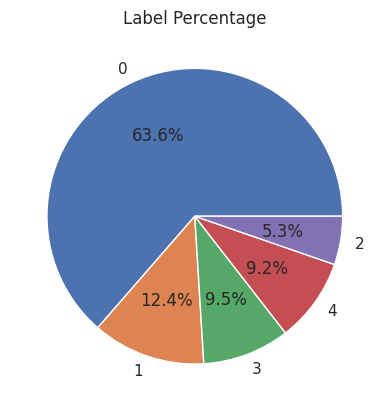

In [29]:
# check the label percentage and visualize it
plt.title('Label Percentage')
plt.pie(mod_df['target'].value_counts(),
       labels = mod_df['target'].astype('int64').unique(),
       autopct = '%1.1f%%')
plt.show()

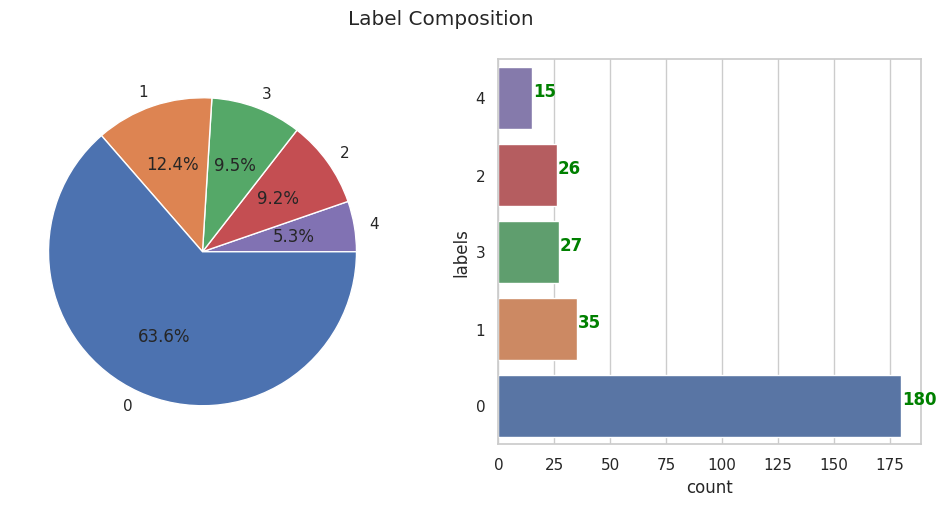

In [30]:
# initial canvas and variables
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
plt.suptitle('Label Composition')
temp = mod_df['target'].value_counts().sort_values(ascending = True)
temp2 = pd.DataFrame({
    'labels': temp.keys(),
    'counter': temp,
}).astype('int64')
colors = ['#8172B3', '#C44E52', '#55A868', '#DD8452', '#4C72B0']

# visualize the label percentage
ax[0].pie(temp2['counter'],
          labels = temp2['labels'],
          autopct = '%1.1f%%',
          colors = colors)

# then visualize the number of data for each label
sns.barplot(ax = ax[1],
            data = temp2,
            x = 'counter',
            y = 'labels',
            orient = 'h',
            order = temp2.sort_values('counter').labels,
            palette = colors)

for i, v in enumerate(temp2['counter'].sort_values()):
    ax[1].text(v + .5, i - .02, str(v),
               color = 'green', fontweight = 'bold')
plt.xlabel('count')
plt.show()

# Modelling

## Hybrid (UnderS. + OverS.) Method

In [31]:
# create temp variable for one label only
temp = mod_df[mod_df['target'] == 0].copy()

# get the index and shuffle it
temp2 = list(temp.index)
random.seed(42)
random.shuffle(temp2)

In [32]:
# proceed the undersampling method
mod_df = mod_df.drop(temp2[130:]).copy()

# make sure the number of target with no heart disease is 130
mod_df['target'].value_counts()

0.0    130
1.0     35
3.0     27
2.0     26
4.0     15
Name: target, dtype: int64

In [33]:
# split dependent and independent features
x = mod_df.iloc[:, :-1]
y = mod_df['target']

In [34]:
# proceed the oversampling method
smote = SMOTE(random_state = 42)
x_hybrid, y_hybrid = smote.fit_resample(x, y)

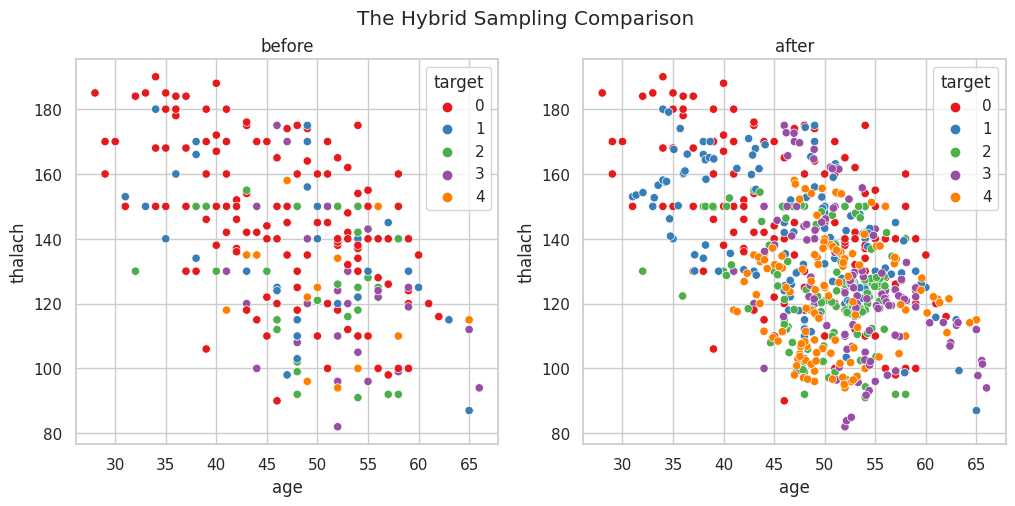

In [35]:
# visualize the hybrid sampling comparison
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.scatterplot(data = mod_df,
                ax = ax[0],
                x = 'age',
                y = 'thalach',
                hue = mod_df['target'].astype('int64'),
                palette='Set1')
sns.scatterplot(ax = ax[1],
                x = x_hybrid['age'],
                y = x_hybrid['thalach'],
                hue = y_hybrid.astype('int64'),
                palette='Set1')

plt.suptitle('The Hybrid Sampling Comparison')
ax[0].set_title('before')
ax[1].set_title('after')
plt.show()

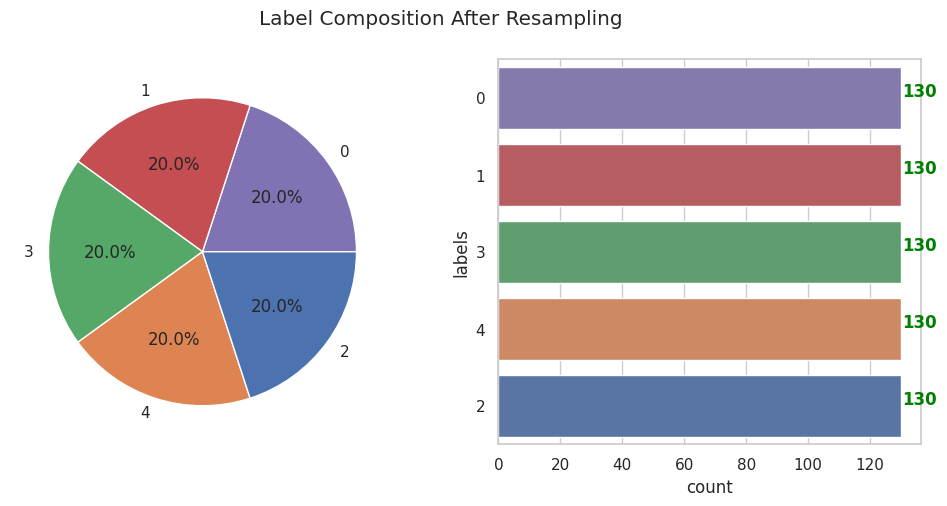

In [36]:
# initial canvas and variables
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
plt.suptitle('Label Composition After Resampling')
temp3 = y_hybrid.value_counts()
temp4 = pd.DataFrame({
    'labels': temp3.keys(),
    'counter': temp3,
}).astype('int64')
colors = ['#8172B3', '#C44E52', '#55A868', '#DD8452', '#4C72B0']

# visualize the label percentage
ax[0].pie(temp4['counter'],
          labels = temp4['labels'],
          autopct = '%1.1f%%',
          colors = colors)

# then visualize the number of data for each label
sns.barplot(ax = ax[1],
            data = temp4,
            x = 'counter',
            y = 'labels',
            orient = 'h',
            order = temp4.sort_values('counter', ascending = False).labels,
            palette = colors)

for i, v in enumerate(temp4['counter'].sort_values(ascending = False)):
    ax[1].text(v + .5, i - .02, str(v),
               color = 'green', fontweight = 'bold')
plt.xlabel('count')
plt.show()

## Data Spliting with/without Normalization

In [37]:
# splitting the oversampling data
x_train, x_test, y_train, y_test = train_test_split(x_hybrid,
                                                    y_hybrid,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y_hybrid
                                                    )

In [38]:
# perform min-max scaler for the data train
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)

# make sure to fit the scaler to the data test
x_test_norm = scaler.transform(x_test)

## K-Nearest Neighbor Algorithm

In [39]:
# create the k-nearest neighbor model
knn = KNeighborsClassifier(n_neighbors = 5)
knn_norm = KNeighborsClassifier(n_neighbors = 5)

# save the model and the prediction
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_norm.fit(x_train_norm, y_train)
knn_norm_pred = knn_norm.predict(x_test_norm)

# print the accuracy
knn_acc = accuracy_score(y_test, knn_pred)
knn_norm_acc = accuracy_score(y_test, knn_norm_pred)
print('The K-Nearest Neighbor Model has', f'{round(knn_acc*100, 2)}%', 'accuracy.')
print('While the K-Nearest Neighbor Model with Normalization has', f'{round(knn_norm_acc*100, 2)}%', 'accuracy.')

The K-Nearest Neighbor Model has 65.64% accuracy.
While the K-Nearest Neighbor Model with Normalization has 75.9% accuracy.


In [40]:
# create the confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)
knn_norm_cm = confusion_matrix(y_test, knn_norm_pred)

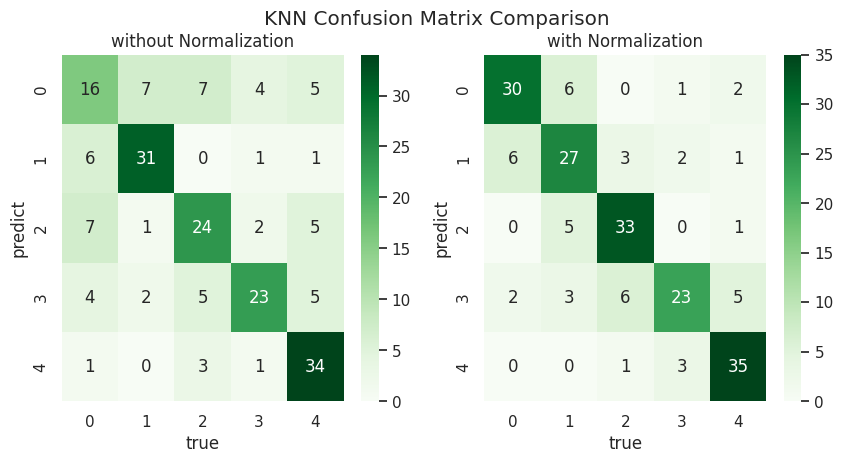

In [41]:
# visualize the comparison
# initial canvas and variables
fig, ax = plt.subplots(1, 2, figsize = (10, 4.5))
plt.suptitle('KNN Confusion Matrix Comparison')

# visualize the confusion matrix
sns.heatmap(knn_cm,
            ax = ax[0],
            annot = True, cmap='Greens')
sns.heatmap(knn_norm_cm,
            ax = ax[1],
            annot = True, cmap='Greens')
ax[0].set_title('without Normalization')
ax[1].set_title('with Normalization')
for i in range(2):
  ax[i].set_xlabel('true')
  ax[i].set_ylabel('predict')
plt.show()

In [42]:
# print the classification report
print(classification_report(y_test, knn_pred))
print(classification_report(y_test, knn_norm_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.41      0.44        39
         1.0       0.76      0.79      0.77        39
         2.0       0.62      0.62      0.62        39
         3.0       0.74      0.59      0.66        39
         4.0       0.68      0.87      0.76        39

    accuracy                           0.66       195
   macro avg       0.65      0.66      0.65       195
weighted avg       0.65      0.66      0.65       195

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78        39
         1.0       0.66      0.69      0.68        39
         2.0       0.77      0.85      0.80        39
         3.0       0.79      0.59      0.68        39
         4.0       0.80      0.90      0.84        39

    accuracy                           0.76       195
   macro avg       0.76      0.76      0.76       195
weighted avg       0.76      0.76      0.76       195



## Random Forest Algorithm

In [43]:
# create the random forest model
rf = RandomForestClassifier(max_depth = 8,
                            n_estimators = 25,
                            random_state = 42)
rf_norm = RandomForestClassifier(max_depth = 8,
                            n_estimators = 25,
                            random_state = 42)

# save the model and the prediction
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_norm.fit(x_train_norm, y_train)
rf_norm_pred = rf_norm.predict(x_test_norm)

# print the accuracy
rf_acc = accuracy_score(y_test, rf_pred)
rf_norm_acc = accuracy_score(y_test, rf_norm_pred)
print('The Random Forest Model has', f'{round(rf_acc*100, 2)}%', 'accuracy.')
print('While the Random Forest Model with Normalization has', f'{round(rf_norm_acc*100, 2)}%', 'accuracy.')

The Random Forest Model has 80.0% accuracy.
While the Random Forest Model with Normalization has 80.0% accuracy.


In [44]:
# create the confusion matrix
rf_cm = confusion_matrix(y_test, rf_pred)
rf_norm_cm = confusion_matrix(y_test, rf_norm_pred)

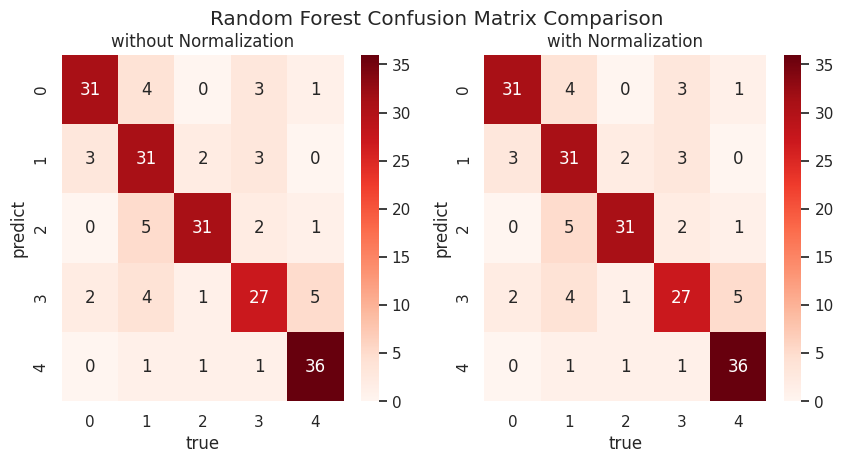

In [45]:
# visualize the comparison
# initial canvas and variables
fig, ax = plt.subplots(1, 2, figsize = (10, 4.5))
plt.suptitle('Random Forest Confusion Matrix Comparison')

# visualize the confusion matrix
sns.heatmap(rf_cm,
            ax = ax[0],
            annot = True, cmap='Reds')
sns.heatmap(rf_norm_cm,
            ax = ax[1],
            annot = True, cmap='Reds')
ax[0].set_title('without Normalization')
ax[1].set_title('with Normalization')
for i in range(2):
  ax[i].set_xlabel('true')
  ax[i].set_ylabel('predict')
plt.show()

In [46]:
# print the classification report
print(classification_report(y_test, rf_pred))
print(classification_report(y_test, rf_norm_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83        39
         1.0       0.69      0.79      0.74        39
         2.0       0.89      0.79      0.84        39
         3.0       0.75      0.69      0.72        39
         4.0       0.84      0.92      0.88        39

    accuracy                           0.80       195
   macro avg       0.80      0.80      0.80       195
weighted avg       0.80      0.80      0.80       195

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83        39
         1.0       0.69      0.79      0.74        39
         2.0       0.89      0.79      0.84        39
         3.0       0.75      0.69      0.72        39
         4.0       0.84      0.92      0.88        39

    accuracy                           0.80       195
   macro avg       0.80      0.80      0.80       195
weighted avg       0.80      0.80      0.80       195



## Gradient Boosting Algorithm

In [47]:
# create the gradient boosting model
gbc = GradientBoostingClassifier(max_depth = 15,
                             max_leaf_nodes = 20,
                             n_estimators = 11,
                             random_state = 42,
                             learning_rate = 0.2)
gbc_norm = GradientBoostingClassifier(max_depth = 15,
                                  max_leaf_nodes = 20,
                                  n_estimators = 11,
                                  random_state = 42,
                                  learning_rate = 0.2)

# save the model and the prediction
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)
gbc_norm.fit(x_train_norm, y_train)
gbc_norm_pred = gbc_norm.predict(x_test_norm)

# print the accuracy
gbc_acc = accuracy_score(y_test, gbc_pred)
gbc_norm_acc = accuracy_score(y_test, gbc_norm_pred)
print('The Gradient Boosting Model has', f'{round(gbc_acc*100, 2)}%', 'accuracy.')
print('While the Gradient Boosting Model with Normalization has', f'{round(gbc_norm_acc*100, 2)}%', 'accuracy.')

The Gradient Boosting Model has 81.54% accuracy.
While the Gradient Boosting Model with Normalization has 81.54% accuracy.


In [48]:
# create the confusion matrix
gbc_cm = confusion_matrix(y_test, gbc_pred)
gbc_norm_cm = confusion_matrix(y_test, gbc_norm_pred)

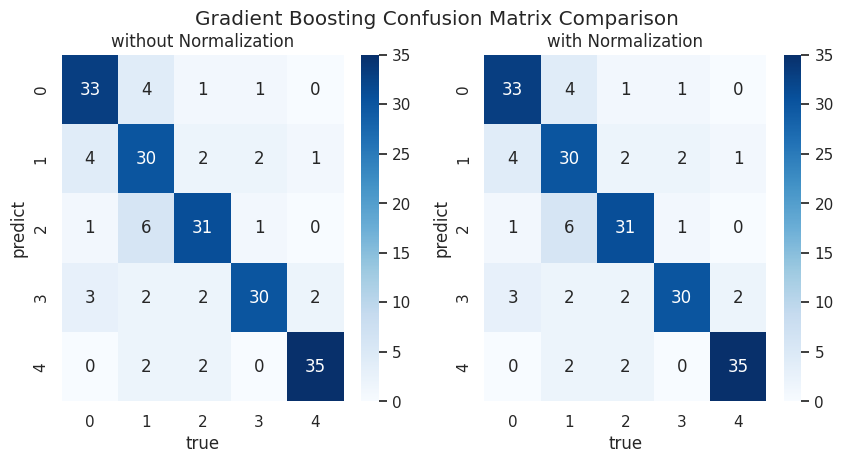

In [49]:
# visualize the comparison
# initial canvas and variables
fig, ax = plt.subplots(1, 2, figsize = (10, 4.5))
plt.suptitle('Gradient Boosting Confusion Matrix Comparison')

# visualize the confusion matrix
sns.heatmap(gbc_cm,
            ax = ax[0],
            annot = True, cmap='Blues')
sns.heatmap(gbc_norm_cm,
            ax = ax[1],
            annot = True, cmap='Blues')
ax[0].set_title('without Normalization')
ax[1].set_title('with Normalization')
for i in range(2):
  ax[i].set_xlabel('true')
  ax[i].set_ylabel('predict')
plt.show()

In [50]:
# print the classification report
print(classification_report(y_test, gbc_pred))
print(classification_report(y_test, gbc_norm_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83        39
         1.0       0.68      0.77      0.72        39
         2.0       0.82      0.79      0.81        39
         3.0       0.88      0.77      0.82        39
         4.0       0.92      0.90      0.91        39

    accuracy                           0.82       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.82      0.82      0.82       195

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83        39
         1.0       0.68      0.77      0.72        39
         2.0       0.82      0.79      0.81        39
         3.0       0.88      0.77      0.82        39
         4.0       0.92      0.90      0.91        39

    accuracy                           0.82       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.82      0.82      0.82       195



## Hyperparameter Tuning with Grid Search

In [51]:
# select parameters and their values to be tuned
knn_parameters = {'n_neighbors': range(5, 21),
                  'metric': ['euclidean', 'manhattan', 'chebyshev'],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

rf_parameters = {'criterion': ['gini', 'entropy'],
                 'max_depth': [5, 7, 8, 12],
                 'n_estimators': [100, 150],
                 'random_state': [42]}

gbc_parameters = {'max_depth': [8, 12],
                  'max_leaf_nodes': [17, 21],
                  'n_estimators': [100, 150],
                  'random_state' : [42]}

In [52]:
# define new tree-based model
knn_grid = KNeighborsClassifier()
rf_grid = RandomForestClassifier()
gbc_grid = GradientBoostingClassifier()

# apply grid search technique for each new model
knn_gs = GridSearchCV(estimator = knn_grid,
                      param_grid = knn_parameters,
                      cv = 5)
rf_gs = GridSearchCV(estimator = rf_grid,
                     param_grid = rf_parameters,
                     cv = 5)
gbc_gs = GridSearchCV(estimator = gbc_grid,
                      param_grid = gbc_parameters,
                      cv = 5)

In [53]:
# train the k-nearest neighbor model
knn_gs.fit(x_train_norm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': range(5, 21),
                         'weights': ['uniform', 'distance']})

In [54]:
# train the random forest model
rf_gs.fit(x_train_norm, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 8, 12], 'n_estimators': [100, 150],
                         'random_state': [42]})

In [55]:
# train the gradient boosting model
gbc_gs.fit(x_train_norm, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [8, 12], 'max_leaf_nodes': [17, 21],
                         'n_estimators': [100, 150], 'random_state': [42]})

In [56]:
# see the best hyperparameter
print('Best parameters for K-Nearest Neighbor:', knn_gs.best_params_)
print('Best parameters for Random Forest:', rf_gs.best_params_)
print('Best parameters for Gradient Boosting:', gbc_gs.best_params_)

Best parameters for K-Nearest Neighbor: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 150, 'random_state': 42}
Best parameters for Gradient Boosting: {'max_depth': 12, 'max_leaf_nodes': 17, 'n_estimators': 150, 'random_state': 42}


In [57]:
# save the model with the tuned hyperparameters
knn_grid = knn_gs.best_estimator_
rf_grid = rf_gs.best_estimator_
gbc_grid = gbc_gs.best_estimator_

In [58]:
# new k-nearest neighbor model
# train the model and save the prediction result
knn_grid.fit(x_train_norm, y_train)
knn_grid_pred = knn_grid.predict(x_test_norm)

# print the accuration and recall
knn_grid_acc = accuracy_score(y_test, knn_grid_pred)
print(f'The new K-Nearest Neighbor model has {round(knn_grid_acc*100, 2)}% accuracy.\nWith the classification report:')
print(classification_report(y_test, knn_grid_pred))

The new K-Nearest Neighbor model has 84.1% accuracy.
With the classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85        39
         1.0       0.79      0.79      0.79        39
         2.0       0.82      0.92      0.87        39
         3.0       0.88      0.77      0.82        39
         4.0       0.82      0.92      0.87        39

    accuracy                           0.84       195
   macro avg       0.85      0.84      0.84       195
weighted avg       0.85      0.84      0.84       195



In [59]:
# new random forest model
# train the model and save the prediction result
rf_grid.fit(x_train_norm, y_train)
rf_grid_pred = rf_grid.predict(x_test_norm)

# print the accuration and recall
rf_grid_acc = accuracy_score(y_test, rf_grid_pred)
print(f'The new Random Forest model has {round(rf_grid_acc*100, 2)}% accuracy.\nWith the classification report:')
print(classification_report(y_test, rf_grid_pred))

The new Random Forest model has 83.59% accuracy.
With the classification report:
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79        39
         1.0       0.76      0.90      0.82        39
         2.0       0.89      0.82      0.85        39
         3.0       0.86      0.77      0.81        39
         4.0       0.84      0.95      0.89        39

    accuracy                           0.84       195
   macro avg       0.84      0.84      0.83       195
weighted avg       0.84      0.84      0.83       195



In [60]:
# new gradient boosting model
# train the model and save the prediction result
gbc_grid.fit(x_train_norm, y_train)
gbc_grid_pred = gbc_grid.predict(x_test_norm)

# print the accuration and recall
gbc_grid_acc = accuracy_score(y_test, gbc_grid_pred)
print(f'The new Gradient Boosting model has {round(gbc_grid_acc*100, 2)}% accuracy.\nWith the classification report:')
print(classification_report(y_test, gbc_grid_pred))

The new Gradient Boosting model has 86.67% accuracy.
With the classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.84        39
         1.0       0.84      0.82      0.83        39
         2.0       0.92      0.87      0.89        39
         3.0       0.91      0.79      0.85        39
         4.0       0.88      0.95      0.91        39

    accuracy                           0.87       195
   macro avg       0.87      0.87      0.87       195
weighted avg       0.87      0.87      0.87       195



# Model Evaluation

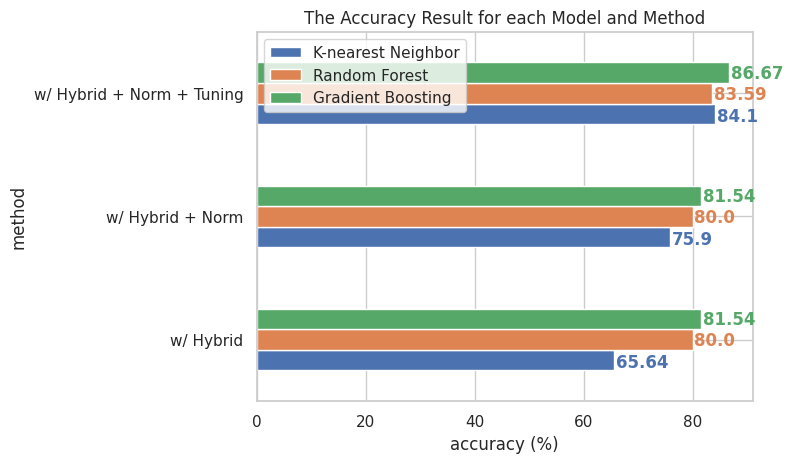

In [61]:
# the accuracy recap
all_acc = pd.DataFrame({'Model Accuracy': ['w/ Hybrid', 'w/ Hybrid + Norm', 'w/ Hybrid + Norm + Tuning'],
                        'K-nearest Neighbor': [round(knn_acc*100, 2), round(knn_norm_acc*100, 2), round(knn_grid_acc*100, 2)],
                        'Random Forest': [round(rf_acc*100, 2), round(rf_norm_acc*100, 2), round(rf_grid_acc*100, 2)],
                        'Gradient Boosting': [round(gbc_acc*100, 2), round(gbc_norm_acc*100, 2), round(gbc_grid_acc*100, 2)]})

# visualize the accuracy recap
sns.set_theme(style = 'whitegrid')
ax = all_acc.plot.barh()
ax.set(yticklabels = all_acc['Model Accuracy'])

# visualize the number of accuracy
for i, v in enumerate(all_acc['K-nearest Neighbor']):
    plt.text(v + .3, i - .225, str(v),
             color = '#4C72B0', fontweight = 'bold')

for i, v in enumerate(all_acc['Random Forest']):
    plt.text(v + .3, i - .05, str(v),
             color = '#DD8452', fontweight = 'bold')

for i, v in enumerate(all_acc['Gradient Boosting']):
    plt.text(v + .3, i + .125, str(v),
             color = '#55A868', fontweight = 'bold')

plt.title('The Accuracy Result for each Model and Method')
plt.ylabel('method')
plt.legend(loc = 'upper left')
plt.xlabel('accuracy (%)')
plt.show()

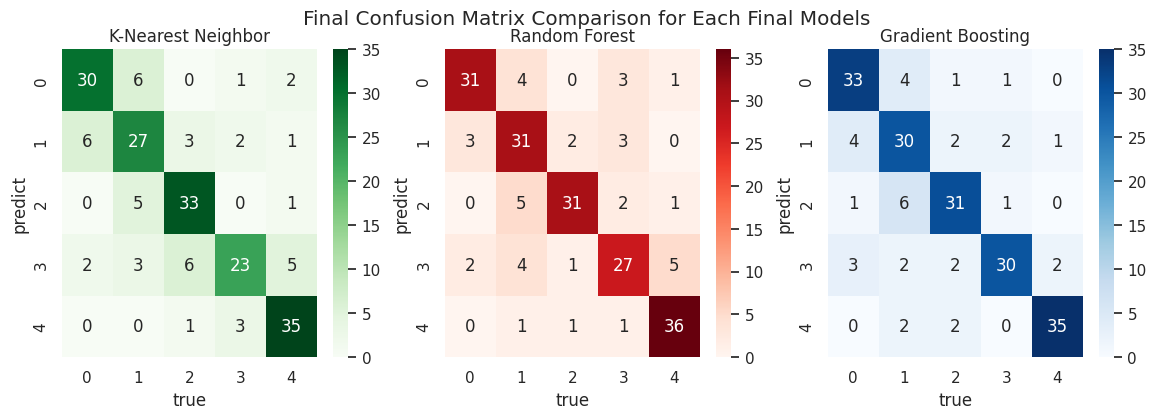

In [62]:
# visualize the three final models
fig, ax = plt.subplots(1, 3, figsize = (14, 4))
plt.suptitle('Final Confusion Matrix Comparison for Each Final Models')

sns.heatmap(knn_norm_cm,
            ax = ax[0],
            annot = True, cmap='Greens')
sns.heatmap(rf_norm_cm,
            ax = ax[1],
            annot = True, cmap='Reds')
sns.heatmap(gbc_norm_cm,
            ax = ax[2],
            annot = True, cmap='Blues')

ax[0].set_title('K-Nearest Neighbor')
ax[1].set_title('Random Forest')
ax[2].set_title('Gradient Boosting')
for i in range(3):
  ax[i].set_xlabel('true')
  ax[i].set_ylabel('predict')
plt.show()

From the visualization above, it can be concluded that `all algorithms` perform well after doing additional methods such as `hybrid sampling`, `normalization`, and `hyperparameter tuning` to receive higher accuracy.

# Save The Necessary Variables

In [63]:
# save the scaler and model
scaler_filename = 'scaler.save'
knn_filename = 'knn_model.sav'
rf_filename = 'rf_model.sav'
gbc_filename = 'gbc_model.sav'
jb.dump(scaler, scaler_filename)
jb.dump(knn_grid, knn_filename)
jb.dump(rf_grid, rf_filename)
jb.dump(gbc_grid, gbc_filename)

# load the model
loaded_scaler = jb.load(scaler_filename)
knn_loaded_model = jb.load(knn_filename)
rf_loaded_model = jb.load(rf_filename)
gbc_loaded_model = jb.load(gbc_filename)

In [64]:
# do the prediction
pred = [28, 0, 3, 200, 600, 1, 2, 150, 1, 5]
pred = np.reshape(pred, (1, -1))
pred = loaded_scaler.transform(pred)
print(knn_loaded_model.predict([pred[0]])[0])
print(rf_loaded_model.predict([pred[0]])[0])
print(gbc_loaded_model.predict([pred[0]])[0])

1.0
4.0
2.0


In [65]:
# save the datasets
mod_df.to_csv('final-hungarian-data.csv', index=False)